---
layout: post
title:  "AO3 Trivia: Popular Tags Part I"
date:   2021-06-09
categories: data-exploration
tags: Python Pandas WordCloud 
---

In this section, we use the python [WordCloud](https://amueller.github.io/word_cloud/) library to visualize the popular tags on AO3.

* Table of Contents
{:toc}

# Loading File

In [1]:
# Load python libraries
import pandas as pd
import gc

In [2]:
# Load data
chunker = pd.read_csv("/home/pi/Downloads/tags-20210226.csv", chunksize=10000)
tags = pd.concat(chunker, ignore_index=True)

In [3]:
# preview
tags

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


# Tag Types

Here are the types of tags on AO3, we can browse and find popular tags under each type.

In [4]:
tags.type.unique()

array(['Media', 'Rating', 'ArchiveWarning', 'Category', 'Character',
       'Fandom', 'Relationship', 'Freeform', 'UnsortedTag'], dtype=object)

We've analyzed the media tags in a previous post "Tags on AO3: Visualization with Pie Chart", and the rating tags with bar-chart-race library in "Rating Tags in Works Part III". 

## Popular Characters

In [5]:
# Top 10 most popular characters based on cached_count
tags.loc[tags[tags.type == "Character"].cached_count.nlargest(10).index]

,id,type,name,canonical,cached_count,merger_id
24,26,Character,Dean Winchester,True,196184,NaN
2663,3175,Character,Tony Stark,True,188737,NaN
5975,7267,Character,Steve Rogers,True,183041,NaN
1535,1803,Character,Harry Potter,True,180395,NaN
2458,2927,Character,Original Characters,True,170848,NaN
23,25,Character,Sam Winchester,True,155832,NaN
277937,479641,Character,Original Female Character(s),True,155668,NaN
39135,54604,Character,Reader,True,138216,NaN
3796,4622,Character,Sherlock Holmes,True,120949,NaN
56907,80648,Character,"James ""Bucky"" Barnes",True,116426,NaN


## Popular Fandoms

In [6]:
# Top 10 most popular fandoms based on cached_count
tags.loc[tags[tags.type == "Fandom"].cached_count.nlargest(10).index]

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
168289,258526,Fandom,Teen Wolf (TV),True,172802,NaN
679946,1001939,Fandom,The Avengers (Marvel Movies),True,157813,NaN
92059,133185,Fandom,Sherlock (TV),True,151925,NaN
5974,7266,Fandom,Marvel,True,147757,NaN
494603,758208,Fandom,Haikyuu!!,True,130918,NaN


## Popular Relationships

In [7]:
# Top 10 most popular relationships based on cached_count
tags.loc[tags[tags.type == "Relationship"].cached_count.nlargest(10).index]

,id,type,name,canonical,cached_count,merger_id
173025,264659,Relationship,Derek Hale/Stiles Stilinski,True,122223,NaN
4700,5672,Relationship,Castiel/Dean Winchester,True,111991,NaN
8900,11006,Relationship,Sherlock Holmes/John Watson,True,87435,NaN
76021,110293,Relationship,"James ""Bucky"" Barnes/Steve Rogers",True,77276,NaN
85,99,Relationship,Draco Malfoy/Harry Potter,True,74244,NaN
5973,7265,Relationship,Steve Rogers/Tony Stark,True,64923,NaN
378701,607596,Relationship,Stucky,False,54045,110293.0
256699,450395,Relationship,Harry Styles/Louis Tomlinson,True,48225,NaN
1114701,1981115,Relationship,Jikook,False,43327,5560386.0
352836,575567,Relationship,Aziraphale/Crowley (Good Omens),True,39319,NaN


## Popular Freeforms

In [8]:
# Top 10 most popular freeforms based on cached_count
tags.loc[tags[tags.type == "Freeform"].cached_count.nlargest(10).index]

,id,type,name,canonical,cached_count,merger_id
96,110,Freeform,Fluff,True,1183065,NaN
158,176,Freeform,Angst,True,813647,NaN
827,965,Freeform,To Read,True,529014,NaN
63,76,Freeform,Complete,True,472403,NaN
1747,2026,Freeform,Smut,True,444264,NaN
2065,2379,Freeform,Hurt/Comfort,True,415318,NaN
48,60,Freeform,Romance,True,353482,NaN
74745,108269,Freeform,Read,True,351016,NaN
979,1160,Freeform,Established Relationship,True,308719,NaN
830,968,Freeform,Alternate Universe,True,306633,NaN


# Word Cloud: Character

In [9]:
# Load wordcloud package
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Clear Memory
gc.collect()

48

In [19]:
# Select a subset
subset = tags.loc[tags[tags.type == "Character"].cached_count.nlargest(50).index]

In [20]:
# WordCloud().generate_from_frequencies() requires a dict
# convert subset to a dict

subset = subset.set_index('name').to_dict()['cached_count']

In [27]:
# plot
# \ is simply a line breaker
wc = WordCloud(max_words=50, random_state=3, width=1800, height=1200,\
              background_color="white", colormap="tab20").generate_from_frequencies(subset)

Text(0.5, 1.0, 'AO3 Most Popular Characters')

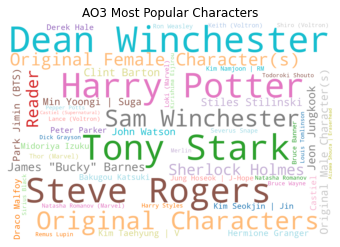

In [28]:
plt.figure(figsize=(6,4))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("AO3 Most Popular Characters")